In [5]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv")
df1

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159510,2021-12-08,Pfizer/BioNTech,VDA,50-59,3,3,1,0,0,5,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159511,2021-12-08,Pfizer/BioNTech,VDA,60-69,3,3,0,1,0,5,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159512,2021-12-08,Pfizer/BioNTech,VDA,70-79,4,6,0,0,0,10,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159513,2021-12-08,Pfizer/BioNTech,VDA,80-89,0,1,0,0,0,1,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste


In [3]:
df2 = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")

totalepopolazione = df2.groupby("area", as_index = False)["totale_popolazione"].sum()
totalepopolazione


,area,totale_popolazione
0,ABR,1188922
1,BAS,494881
2,CAL,1689716
3,CAM,5104347
4,EMR,3998406
5,FVG,1088152
6,LAZ,5147533
7,LIG,1399466
8,LOM,9246804
9,MAR,1366477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


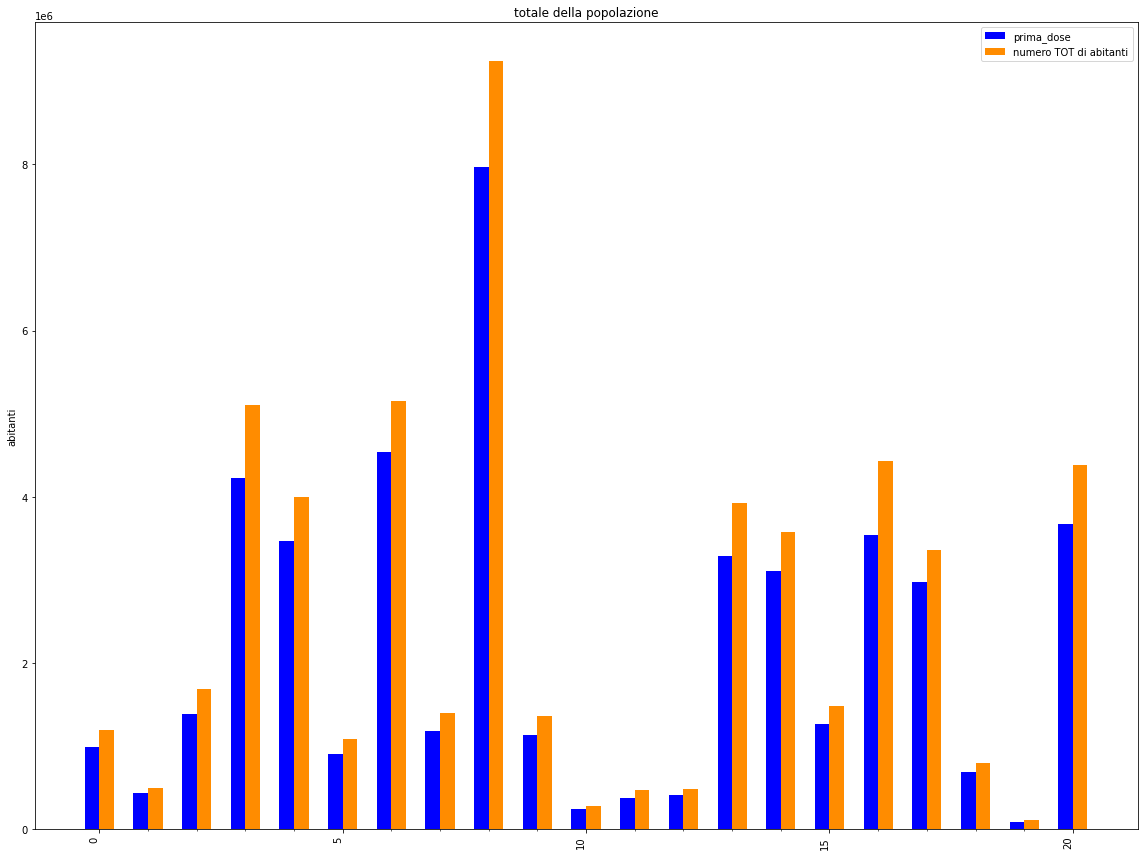

In [6]:
#il primo deve visualizzare, per ogni regione, il numero di vaccinati (prima dose) e il numero totale di abitanti di quella regione

df1groupby = df1.groupby("area",as_index = False)["prima_dose"].sum()

labels = list(df1groupby["area"])

fig = plt.figure(figsize=(16,12)) 
ax = plt.axes()

# the label locations
xpos = np.arange(len(labels))

# the width of the bars  
width = 0.3  

#   -0.15  ----->   perche la grandezza delle colonne è 0.3 e la meta è 0.15
#   +0.15  ----->   perche la grandezza delle colonne è 0.3 e la meta è 0.15
ax.bar(xpos - width/2 ,df1groupby["prima_dose"],label="prima_dose",width = width,color="blue")
ax.bar(xpos + width/2 ,totalepopolazione["totale_popolazione"],label="numero TOT di abitanti",width = width,color="#ff8c00")

fig.autofmt_xdate(rotation=90)
ax.set_ylabel('abitanti')
ax.set_title('totale della popolazione')
ax.set_xticks(xpos, labels)

ax.legend()
ax.legend(loc=0)

fig.tight_layout()

plt.show()

In [7]:
#il secondo deve contenere le percentuali di vaccinazioni (prima dose) sul totale dei vaccinati. 

df2groupby = df1.groupby("area",as_index = False)["prima_dose"].sum()
df2groupby["% vaccinati(prima dose)"] = round((df2groupby["prima_dose"] *100) / totalepopolazione["totale_popolazione"], 2)
df2groupby

,area,prima_dose,% vaccinati(prima dose)
0,ABR,991170,83.37
1,BAS,428492,86.58
2,CAL,1378822,81.60
3,CAM,4223716,82.75
4,EMR,3472668,86.85
5,FVG,901748,82.87
6,LAZ,4541686,88.23
7,LIG,1185884,84.74
8,LOM,7971962,86.21
9,MAR,1132704,82.89


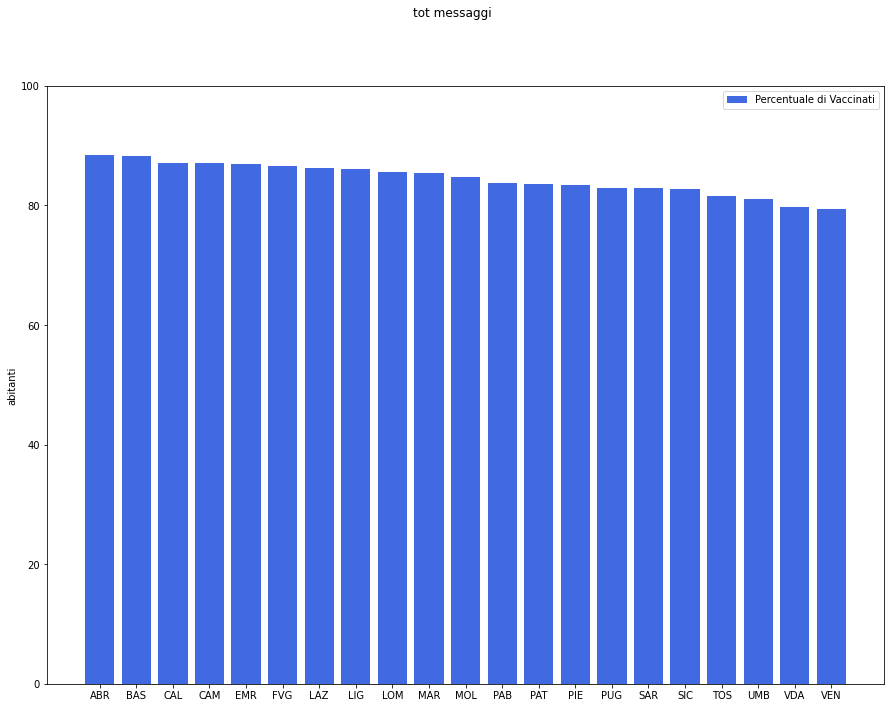

In [11]:
df3groupby = df2groupby["% vaccinati(prima dose)"].sort_values( ascending = False)
df3groupby

fig = plt.figure(figsize=(15,11))

ax = plt.axes()
ax.bar(df2groupby["area"], df3groupby.values, label = "Percentuale di Vaccinati", color="royalblue")

ax.set_ylabel("abitanti")
ax.set_ylim([0, 100])
fig.suptitle("tot messaggi")
ax.legend(loc=0)

plt.show()